**Almas Fathin Irbah**
> Dataset : eCommerce behavior data from multi category store \
> Sumber : Kaggle \
> Link Dataset : https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

# **Preparation**

In [ ]:
pip install squarify

In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import os
import squarify
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/data_file'

/content/drive/.shortcut-targets-by-id/1t8EkfV-chB44rwwHoMuk27bpM9uQIAqz/data_file


In [ ]:
# check file in folder
!ls

 2019-Nov.csv	      'property data.csv'
 2019-Nov.pkl	       quiz_data.json
 2019-Oct.csv	       student_grade_prediction.xlsx
 2019-Oct.yaml	       student-mat.csv
 data_student.pkl      USA_Housing.csv
 earthquake_data.csv   USA_Housing.gsheet
 melb_data.csv	       WA_Fn-UseC_-HR-Employee-Attrition.csv


# **OCTOBER 2019**

## **Handle The Missing Data**

In [ ]:
# read the data
cols = ['event_time', 'event_type', 'category_code', 'brand', 'price','user_id','user_session']
df2019oct = pd.read_csv('2019-Oct.csv', usecols = cols)
df2019oct.head(10)

,event_time,event_type,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


In [ ]:
df2019oct=df2019oct.loc[df2019oct.event_type == 'purchase']

In [ ]:
# simple data checking - get row and column of dataframe
print(df2019oct.shape)

(742849, 7)


In [ ]:
# simple data checking - get columns name
print(df2019oct.columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'price',
       'user_id', 'user_session'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df2019oct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742849 entries, 162 to 42448657
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     742849 non-null  object 
 1   event_type     742849 non-null  object 
 2   category_code  569424 non-null  object 
 3   brand          684544 non-null  object 
 4   price          742849 non-null  float64
 5   user_id        742849 non-null  int64  
 6   user_session   742849 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 45.3+ MB


In [ ]:
# check standard missing value - multiple column
missing_data = df2019oct.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

event_time
False    742849
Name: event_time, dtype: int64

event_type
False    742849
Name: event_type, dtype: int64

category_code
False    569424
True     173425
Name: category_code, dtype: int64

brand
False    684544
True      58305
Name: brand, dtype: int64

price
False    742849
Name: price, dtype: int64

user_id
False    742849
Name: user_id, dtype: int64

user_session
False    742849
Name: user_session, dtype: int64



In [ ]:
# check standard missing value - category_code column
df2019oct[df2019oct['category_code'].isnull()]

,event_time,event_type,category_code,brand,price,user_id,user_session
379,2019-10-01 00:06:02 UTC,purchase,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
1566,2019-10-01 02:19:12 UTC,purchase,NaN,pdw,391.26,516178643,4d74b49e-3838-43cc-ac2e-a0490942b464
1760,2019-10-01 02:19:59 UTC,purchase,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
1884,2019-10-01 02:20:28 UTC,purchase,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
2093,2019-10-01 02:21:07 UTC,purchase,NaN,omron,62.52,516815266,918c33db-9bb0-41b9-a148-47523330eddd
...,...,...,...,...,...,...,...
42447435,2019-10-31 23:49:26 UTC,purchase,NaN,xiaomi,29.58,514905226,6f25d2de-bb1c-4e68-b848-f03372fb6e7d
42447626,2019-10-31 23:51:02 UTC,purchase,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42447890,2019-10-31 23:53:18 UTC,purchase,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42448049,2019-10-31 23:54:33 UTC,purchase,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In [ ]:
#check the most frequent value object 
df2019oct['category_code'].value_counts().idxmax()

'electronics.smartphone'

In [ ]:
# check standard missing value - brand column
df2019oct[df2019oct['brand'].isnull()]

,event_time,event_type,category_code,brand,price,user_id,user_session
1760,2019-10-01 02:19:59 UTC,purchase,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
1884,2019-10-01 02:20:28 UTC,purchase,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
2321,2019-10-01 02:21:45 UTC,purchase,NaN,NaN,60.49,517953667,7954f58c-158d-402d-9820-c502a5eea86d
2778,2019-10-01 02:23:03 UTC,purchase,construction.tools.saw,NaN,120.47,513484630,92bc0a54-4dab-4748-9a39-edbb4c760254
3978,2019-10-01 02:26:02 UTC,purchase,NaN,NaN,33.46,512594464,f18609cf-7cab-47cf-aaf8-8622202722bd
...,...,...,...,...,...,...,...
42446989,2019-10-31 23:45:46 UTC,purchase,NaN,NaN,115.58,513911691,e6e67023-2258-4341-bd66-a9500d7da596
42447626,2019-10-31 23:51:02 UTC,purchase,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42447890,2019-10-31 23:53:18 UTC,purchase,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42448049,2019-10-31 23:54:33 UTC,purchase,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In [ ]:
# check the most frequent value object - brand column
df2019oct['brand'].value_counts().idxmax()

'samsung'

In [ ]:
# handle missing data - replace values with the most frequent value object - category_code column
df2019oct['category_code'].replace(np.nan, 'electronics.smartphone', inplace=True)

In [ ]:
# handle missing data - replace values with the most frequent value object- brand column
df2019oct['brand'].replace(np.nan, 'samsung', inplace=True)

In [ ]:
# check again standard missing value - multiple column
missing_data = df2019oct.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

event_time
False    742849
Name: event_time, dtype: int64

event_type
False    742849
Name: event_type, dtype: int64

category_code
False    742849
Name: category_code, dtype: int64

brand
False    742849
Name: brand, dtype: int64

price
False    742849
Name: price, dtype: int64

user_id
False    742849
Name: user_id, dtype: int64

user_session
False    742849
Name: user_session, dtype: int64



## **Handle Outlier**

In [ ]:
# simple data checking - get dataframe description
df2019oct.describe()

,price,user_id
count,742849.000000,7.428490e+05
mean,309.561569,5.356101e+08
std,348.873241,1.826311e+07
min,0.770000,2.646498e+08
25%,87.490000,5.167003e+08
50%,179.840000,5.351349e+08
75%,375.210000,5.536670e+08
max,2574.070000,5.662783e+08


In [ ]:
df2019oct.head(10)

,event_time,event_type,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,electronics.smartphone,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
603,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
618,2019-10-01 00:10:08 UTC,purchase,electronics.smartphone,apple,515.67,524325294,0b74a829-f9d7-4654-b5b0-35bc9822c238
672,2019-10-01 00:10:56 UTC,purchase,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0
749,2019-10-01 00:12:14 UTC,purchase,electronics.audio.headphone,apple,171.56,533624186,e5ac3caa-e6d5-4d6b-ae06-2c18cd9ca683
860,2019-10-01 00:14:14 UTC,purchase,electronics.smartphone,vivo,463.31,555083442,83d12d1a-5452-4fa0-abbb-d9f492f8b562


In [ ]:
# assign variable for column in numeric type
numeric_column = ['price']

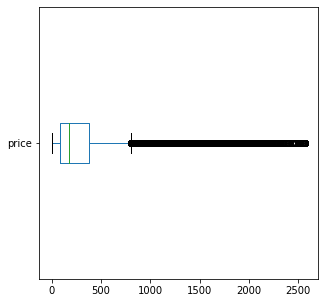

In [ ]:
# check outlier using boxplot - 1
df2019oct.boxplot(
    column=['price'],
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )

In [ ]:
# get IQR for each numeric column
Q1 = df2019oct[numeric_column].quantile(0.25)
Q3 = df2019oct[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 price    87.49
Name: 0.25, dtype: float64

Q3:
 price    375.21
Name: 0.75, dtype: float64

IQR:
 price    287.72
dtype: float64

Min:
 price   -344.09
dtype: float64

Max:
 price    806.79
dtype: float64


In [ ]:
# filter price
filter_price_min = df2019oct['price']<boxplot_min['price']
filter_price_max = df2019oct['price']>boxplot_max['price']

df2019oct_non_outlier = df2019oct[(
    filter_price_min|filter_price_max
    )]

In [ ]:
df2019oct_non_outlier.shape

(71345, 7)

In [ ]:
df2019oct_non_outlier

,event_time,event_type,category_code,brand,price,user_id,user_session
1649,2019-10-01 02:19:34 UTC,purchase,electronics.smartphone,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d
1905,2019-10-01 02:20:33 UTC,purchase,electronics.smartphone,apple,946.97,516198933,e1050ba4-5425-4b8e-9cc8-194878031718
2927,2019-10-01 02:23:25 UTC,purchase,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c
5210,2019-10-01 02:28:40 UTC,purchase,electronics.smartphone,apple,975.57,552408931,e8b95f1a-5f87-40ab-b75a-40942d5a1726
6496,2019-10-01 02:31:01 UTC,purchase,electronics.smartphone,apple,1206.40,555462711,38c6d3f7-6c32-4fed-bca6-ef98e1746386
...,...,...,...,...,...,...,...
42446632,2019-10-31 23:42:46 UTC,purchase,electronics.smartphone,apple,1661.09,566278294,88aa1f8b-8a36-4767-a0e2-2b984c2190c1
42446893,2019-10-31 23:44:56 UTC,purchase,electronics.smartphone,samsung,1142.62,560068016,ce520a95-f8eb-4c7a-9999-20eb12d26305
42447140,2019-10-31 23:46:47 UTC,purchase,computers.desktop,netechnics,1055.34,512786498,80ba8f6f-6385-4ff3-b0c6-74ca812bcdcb
42447440,2019-10-31 23:49:30 UTC,purchase,electronics.smartphone,apple,928.38,544501248,8ae7872b-55c5-4e61-ab65-803091bacd7c


## **Handle Date Column**

In [ ]:
# simple data checking - get row and column of dataframe
print(df2019oct_non_outlier.shape)

(71345, 7)


In [ ]:
# simple data checking - get columns name
print(df2019oct_non_outlier.columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'price',
       'user_id', 'user_session'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df2019oct_non_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71345 entries, 1649 to 42448362
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     71345 non-null  object 
 1   event_type     71345 non-null  object 
 2   category_code  71345 non-null  object 
 3   brand          71345 non-null  object 
 4   price          71345 non-null  float64
 5   user_id        71345 non-null  int64  
 6   user_session   71345 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ MB


In [ ]:
# simple data checking - check 1 of the date column
df2019oct_non_outlier['event_time'].head(15)

1649     2019-10-01 02:19:34 UTC
1905     2019-10-01 02:20:33 UTC
2927     2019-10-01 02:23:25 UTC
5210     2019-10-01 02:28:40 UTC
6496     2019-10-01 02:31:01 UTC
6904     2019-10-01 02:31:46 UTC
7402     2019-10-01 02:32:38 UTC
7619     2019-10-01 02:32:59 UTC
7855     2019-10-01 02:33:23 UTC
8097     2019-10-01 02:33:51 UTC
8245     2019-10-01 02:34:08 UTC
8385     2019-10-01 02:34:23 UTC
8650     2019-10-01 02:34:58 UTC
10212    2019-10-01 02:37:40 UTC
11177    2019-10-01 02:39:22 UTC
Name: event_time, dtype: object

In [ ]:
df2019oct_non_outlier['event_time'].value_counts()

2019-10-15 17:01:47 UTC    4
2019-10-08 11:56:13 UTC    3
2019-10-09 06:17:49 UTC    3
2019-10-19 08:49:13 UTC    3
2019-10-23 10:52:26 UTC    3
                          ..
2019-10-11 11:15:50 UTC    1
2019-10-04 13:20:01 UTC    1
2019-10-11 03:41:31 UTC    1
2019-10-11 09:53:54 UTC    1
2019-10-20 06:53:59 UTC    1
Name: event_time, Length: 70023, dtype: int64

In [ ]:
# change to date type & change date format
series_date_in_date = pd.to_datetime(df2019oct_non_outlier['event_time'],errors='raise',dayfirst=False,yearfirst=True,utc=True)
series_date_in_date

1649       2019-10-01 02:19:34+00:00
1905       2019-10-01 02:20:33+00:00
2927       2019-10-01 02:23:25+00:00
5210       2019-10-01 02:28:40+00:00
6496       2019-10-01 02:31:01+00:00
                      ...           
42446632   2019-10-31 23:42:46+00:00
42446893   2019-10-31 23:44:56+00:00
42447140   2019-10-31 23:46:47+00:00
42447440   2019-10-31 23:49:30+00:00
42448362   2019-10-31 23:56:53+00:00
Name: event_time, Length: 71345, dtype: datetime64[ns, UTC]

In [ ]:
# parsing date column
series_date_in_date = pd.to_datetime(df2019oct_non_outlier['event_time'],errors='raise',dayfirst=False,yearfirst=True,utc=True)

In [ ]:
series_date_in_date.dt.day

1649         1
1905         1
2927         1
5210         1
6496         1
            ..
42446632    31
42446893    31
42447140    31
42447440    31
42448362    31
Name: event_time, Length: 71345, dtype: int64

In [ ]:
series_date_in_date.dt.month

1649        10
1905        10
2927        10
5210        10
6496        10
            ..
42446632    10
42446893    10
42447140    10
42447440    10
42448362    10
Name: event_time, Length: 71345, dtype: int64

In [ ]:
series_date_in_date.dt.year

1649        2019
1905        2019
2927        2019
5210        2019
6496        2019
            ... 
42446632    2019
42446893    2019
42447140    2019
42447440    2019
42448362    2019
Name: event_time, Length: 71345, dtype: int64

In [ ]:
df2019oct_non_outlier['event_days_of_week'] = series_date_in_date.dt.day_name()
df2019oct_non_outlier['event_days_of_week']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1649         Tuesday
1905         Tuesday
2927         Tuesday
5210         Tuesday
6496         Tuesday
              ...   
42446632    Thursday
42446893    Thursday
42447140    Thursday
42447440    Thursday
42448362    Thursday
Name: event_days_of_week, Length: 71345, dtype: object

In [ ]:
df2019oct_non_outlier['event_date'] = series_date_in_date.dt.day
df2019oct_non_outlier['event_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1649         1
1905         1
2927         1
5210         1
6496         1
            ..
42446632    31
42446893    31
42447140    31
42447440    31
42448362    31
Name: event_date, Length: 71345, dtype: int64

In [ ]:
df2019oct_non_outlier['event_hour'] = series_date_in_date.dt.hour
df2019oct_non_outlier['event_hour']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1649         2
1905         2
2927         2
5210         2
6496         2
            ..
42446632    23
42446893    23
42447140    23
42447440    23
42448362    23
Name: event_hour, Length: 71345, dtype: int64

## **Best Products to Sell**

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Popular product in new user
new_user = df2019oct_non_outlier.drop_duplicates()
new_user['brand'].value_counts()

apple      59417
samsung     6374
acer         757
huawei       362
lenovo       340
           ...  
xxr            1
trek           1
hubert         1
cybex          1
stihl          1
Name: brand, Length: 184, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd73fb36310>],
      dtype=object)

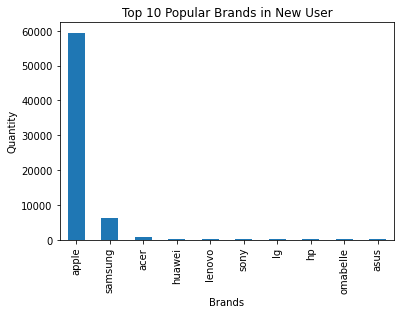

In [ ]:
# Top 10 popular brands in new user
new_user['brand'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Brands', 
    ylabel='Quantity', 
    label='Top 10 Popular Brands in New User', 
    subplots=True
    )

In [ ]:
# Popular product in repeat user
repeat_user = df2019oct_non_outlier[df2019oct_non_outlier.duplicated()]
repeat_user['brand'].value_counts()

apple      5
samsung    1
Name: brand, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd73f3e5090>],
      dtype=object)

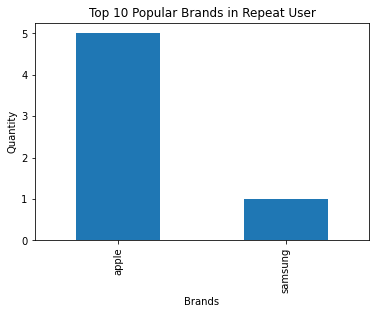

In [ ]:
# Top 10 popular brands in repeat user
repeat_user['brand'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Brands', 
    ylabel='Quantity', 
    label='Top 10 Popular Brands in Repeat User', 
    subplots=True
    )

In [ ]:
# Popular categories in new user
new_user['category_code'].value_counts()

electronics.smartphone                    65171
computers.notebook                         2823
electronics.video.tv                       1002
electronics.tablet                          528
appliances.kitchen.refrigerators            417
computers.desktop                           370
electronics.clocks                          165
appliances.environment.air_conditioner      110
appliances.sewing_machine                   105
furniture.living_room.sofa                  104
appliances.kitchen.washer                    83
appliances.environment.vacuum                58
appliances.kitchen.coffee_machine            57
electronics.camera.photo                     39
electronics.audio.acoustic                   31
sport.bicycle                                29
construction.tools.saw                       27
computers.components.videocards              25
electronics.camera.video                     21
kids.skates                                  21
sport.trainer                           

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd73f352d90>],
      dtype=object)

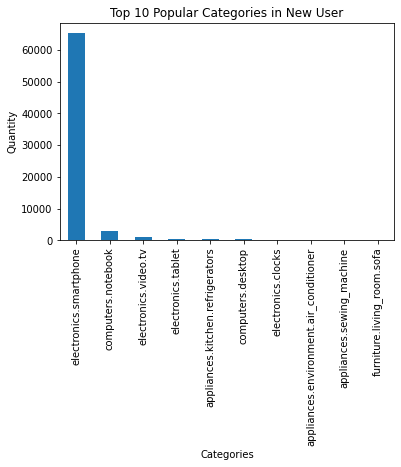

In [ ]:
# Top 10 popular categories in new user
new_user['category_code'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Categories', 
    ylabel='Quantity', 
    label='Top 10 Popular Categories in New User', 
    subplots=True
    )

In [ ]:
# Popular categories in repeat user
repeat_user['category_code'].value_counts()

electronics.smartphone    6
Name: category_code, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd73f2bd550>],
      dtype=object)

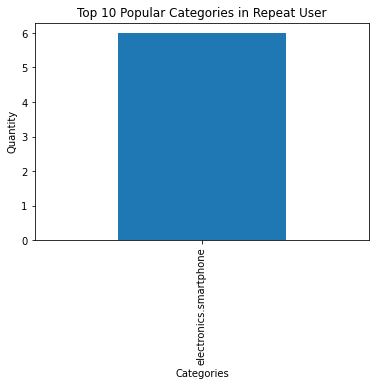

In [ ]:
# Top 10 popular categories in repeat user
repeat_user['category_code'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Categories', 
    ylabel='Quantity', 
    label='Top 10 Popular Categories in Repeat User', 
    subplots=True
    )

## **Best Event to predict that User most likely to buy a product**

In [ ]:
# Best Event time
new_user['event_time'].value_counts().nlargest(10)

2019-10-15 17:01:47 UTC    4
2019-10-18 07:40:18 UTC    3
2019-10-11 08:48:11 UTC    3
2019-10-30 09:11:37 UTC    3
2019-10-16 14:35:48 UTC    3
2019-10-16 04:50:07 UTC    3
2019-10-08 11:56:13 UTC    3
2019-10-19 08:49:13 UTC    3
2019-10-09 06:17:49 UTC    3
2019-10-18 08:09:04 UTC    3
Name: event_time, dtype: int64

In [ ]:
# Best Event time
repeat_user['event_time'].value_counts().nlargest(10)

2019-10-18 04:14:38 UTC    1
2019-10-22 17:38:05 UTC    1
2019-10-31 05:32:56 UTC    1
2019-10-23 10:52:26 UTC    1
2019-10-29 03:56:30 UTC    1
2019-10-25 12:09:57 UTC    1
Name: event_time, dtype: int64

In [ ]:
# Best event type in new user
new_user['event_type'].value_counts()

purchase    71339
Name: event_type, dtype: int64

In [ ]:
# Best event type in repeat user
repeat_user['event_type'].value_counts()

## **Time Series** 

### **New User**

In [ ]:
new_user.head()

,event_time,event_type,category_code,brand,price,user_id,user_session,event_days_of_week,event_date,event_hour
1649,2019-10-01 02:19:34 UTC,purchase,electronics.smartphone,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d,Tuesday,1,2
1905,2019-10-01 02:20:33 UTC,purchase,electronics.smartphone,apple,946.97,516198933,e1050ba4-5425-4b8e-9cc8-194878031718,Tuesday,1,2
2927,2019-10-01 02:23:25 UTC,purchase,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c,Tuesday,1,2
5210,2019-10-01 02:28:40 UTC,purchase,electronics.smartphone,apple,975.57,552408931,e8b95f1a-5f87-40ab-b75a-40942d5a1726,Tuesday,1,2
6496,2019-10-01 02:31:01 UTC,purchase,electronics.smartphone,apple,1206.40,555462711,38c6d3f7-6c32-4fed-bca6-ef98e1746386,Tuesday,1,2


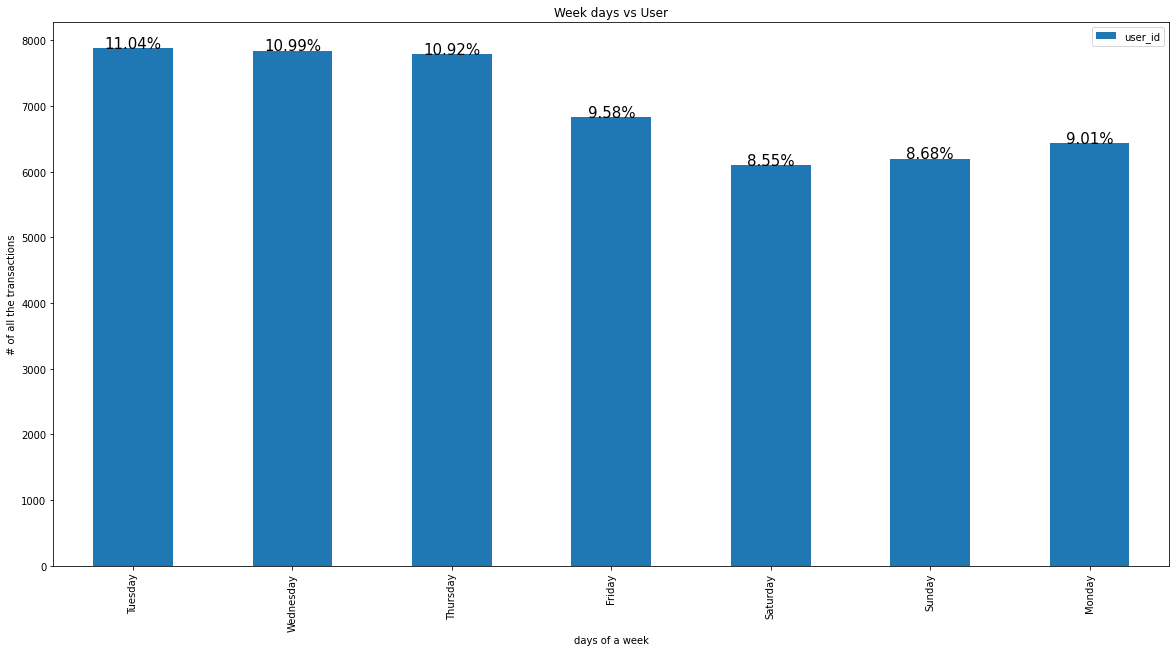

In [ ]:
ax = new_user.groupby(new_user['event_days_of_week'],sort=False)['user_id'].nunique().reset_index().set_index('event_days_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs User')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(new_user)*100),
            ha="center", fontsize=15)

plt.show()

In [ ]:
#Timeplot01

new_user_timeline01 = new_user.groupby(new_user['event_date'])['user_id'].nunique().reset_index()
new_user_timeline01.columns = ['Event Date','User']
new_user_timeline01

,Event Date,User
0,1,1575
1,2,1459
2,3,1538
3,4,2137
4,5,1676
5,6,1539
6,7,1452
7,8,1605
8,9,1621
9,10,1604


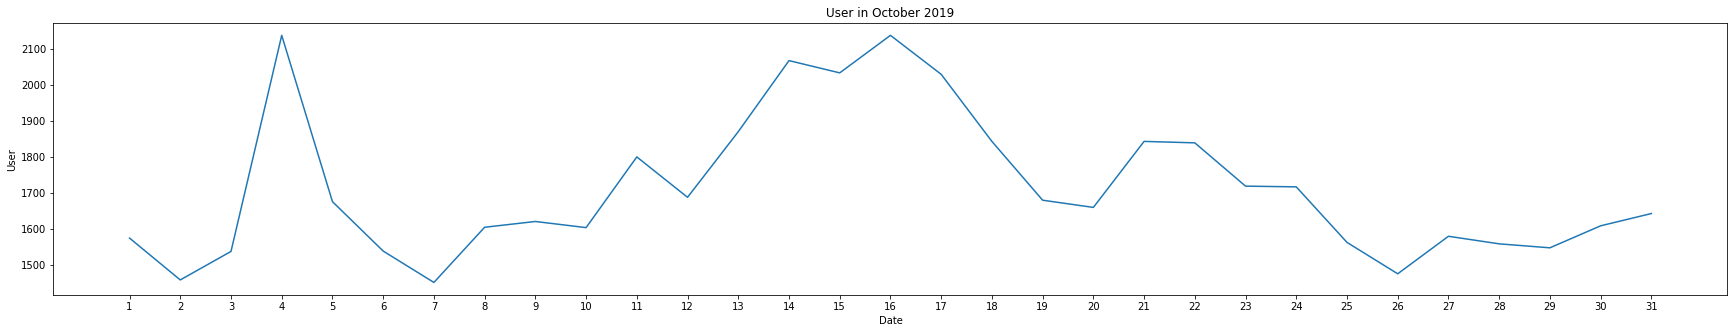

In [ ]:
x = np.arange(0,len(new_user_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,new_user_timeline01['User'])
ax.set_xticks(x)
ax.set_xticklabels(new_user_timeline01['Event Date'])
ax.set_title('User in October 2019')
ax.set_xlabel('Date')
ax.set_ylabel('User')
  
plt.show()

In [ ]:
#Timeplot02

new_user_timeline02 = new_user.groupby(new_user['event_hour'])['user_id'].nunique().reset_index()
new_user_timeline02.columns = ['Event Hour','User']
new_user_timeline02

,Event Hour,User
0,0,270
1,1,368
2,2,861
3,3,1878
4,4,2727
5,5,3285
6,6,3632
7,7,3763
8,8,3974
9,9,4052


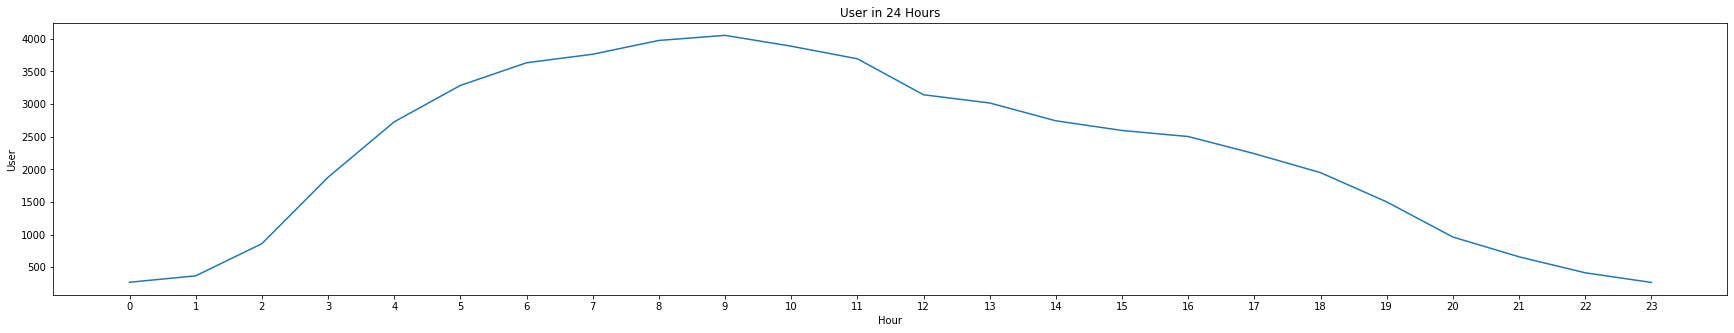

In [ ]:
x = np.arange(0,len(new_user_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,new_user_timeline02['User'])
ax.set_xticks(x)
ax.set_xticklabels(new_user_timeline02['Event Hour'])
ax.set_title('User in 24 Hours')
ax.set_xlabel('Hour')
ax.set_ylabel('User')
    
plt.show()

### **Repeat User**

In [ ]:
repeat_user.head()

,event_time,event_type,category_code,brand,price,user_id,user_session,event_days_of_week,event_date,event_hour
23495070,2019-10-18 04:14:38 UTC,purchase,electronics.smartphone,apple,1003.60,544307339,fbd8ba89-2a83-4ca6-9a8e-ad9b5c0086ef,Friday,18,4
30432760,2019-10-22 17:38:05 UTC,purchase,electronics.smartphone,apple,931.43,523841663,0f434af5-f294-4dcd-be8e-335dfe62f8c2,Tuesday,22,17
31247570,2019-10-23 10:52:26 UTC,purchase,electronics.smartphone,samsung,1286.75,558133595,9d8f2844-37d1-433d-a53d-b0da52eb06ba,Wednesday,23,10
34056667,2019-10-25 12:09:57 UTC,purchase,electronics.smartphone,apple,998.73,551064724,122ac4f0-ba8c-483a-ab0a-93c9ba1faf47,Friday,25,12
38864750,2019-10-29 03:56:30 UTC,purchase,electronics.smartphone,apple,967.80,535789523,9e037fb6-7286-4136-b1e6-a0eb93e0c1ce,Tuesday,29,3


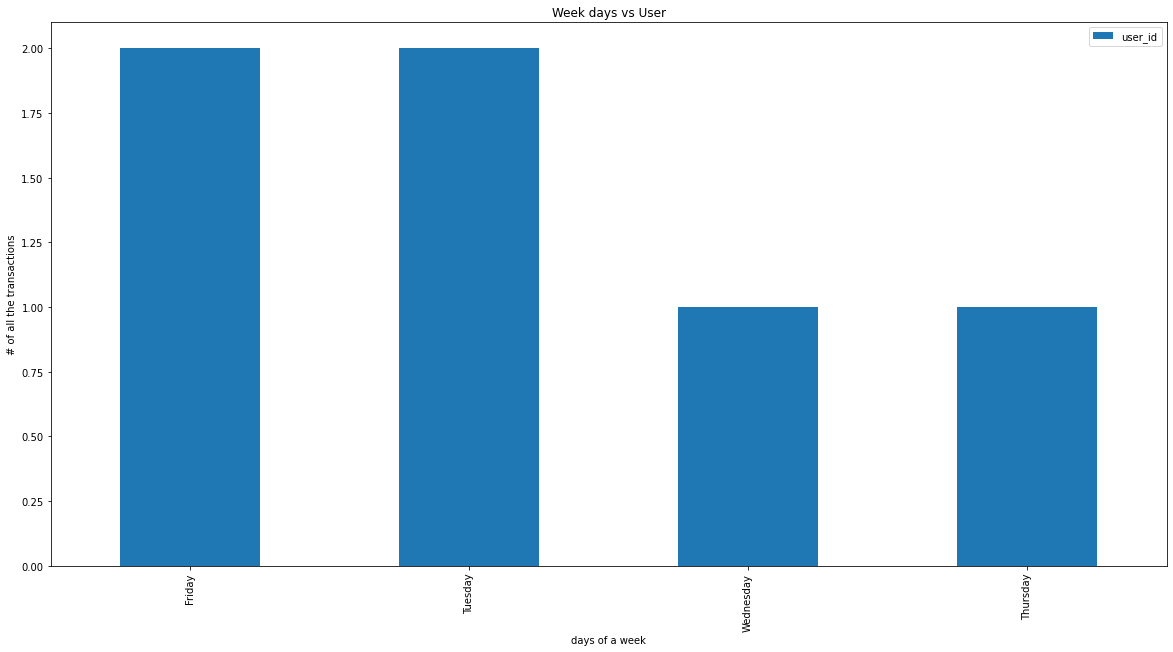

In [ ]:
ax = repeat_user.groupby(repeat_user['event_days_of_week'],sort=False)['user_id'].nunique().reset_index().set_index('event_days_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs User')

plt.show()

In [ ]:
#Timeplot01

repeat_user_timeline01 = repeat_user.groupby(repeat_user['event_date'])['user_id'].nunique().reset_index()
repeat_user_timeline01.columns = ['Event Date','User']
repeat_user_timeline01

,Event Date,User
0,18,1
1,22,1
2,23,1
3,25,1
4,29,1
5,31,1


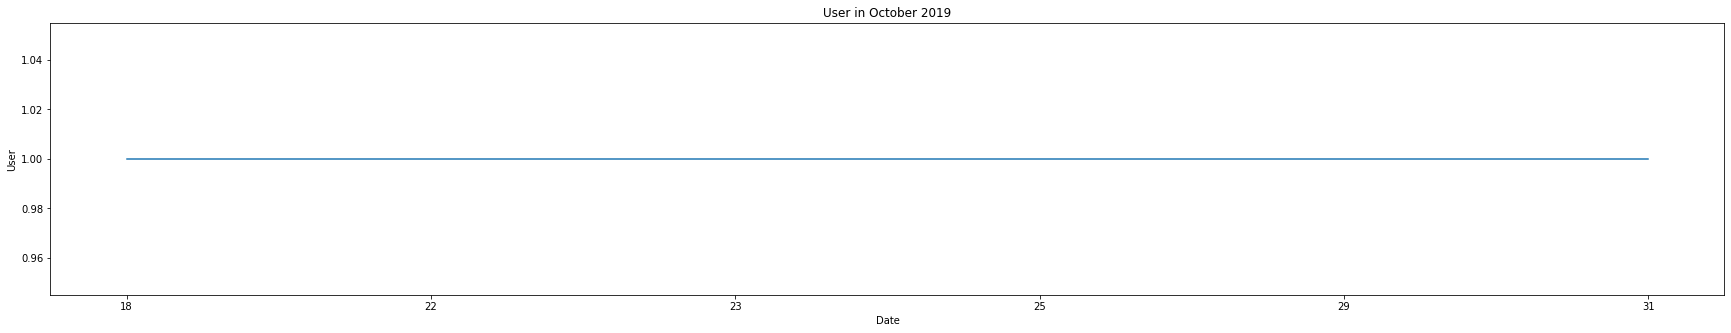

In [ ]:
x = np.arange(0,len(repeat_user_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,repeat_user_timeline01['User'])
ax.set_xticks(x)
ax.set_xticklabels(repeat_user_timeline01['Event Date'])
ax.set_title('User in October 2019')
ax.set_xlabel('Date')
ax.set_ylabel('User')
  
plt.show()

In [ ]:
#Timeplot02

repeat_user_timeline02 = repeat_user.groupby(repeat_user['event_hour'])['user_id'].nunique().reset_index()
repeat_user_timeline02.columns = ['Event Hour','User']
repeat_user_timeline02

,Event Hour,User
0,3,1
1,4,1
2,5,1
3,10,1
4,12,1
5,17,1


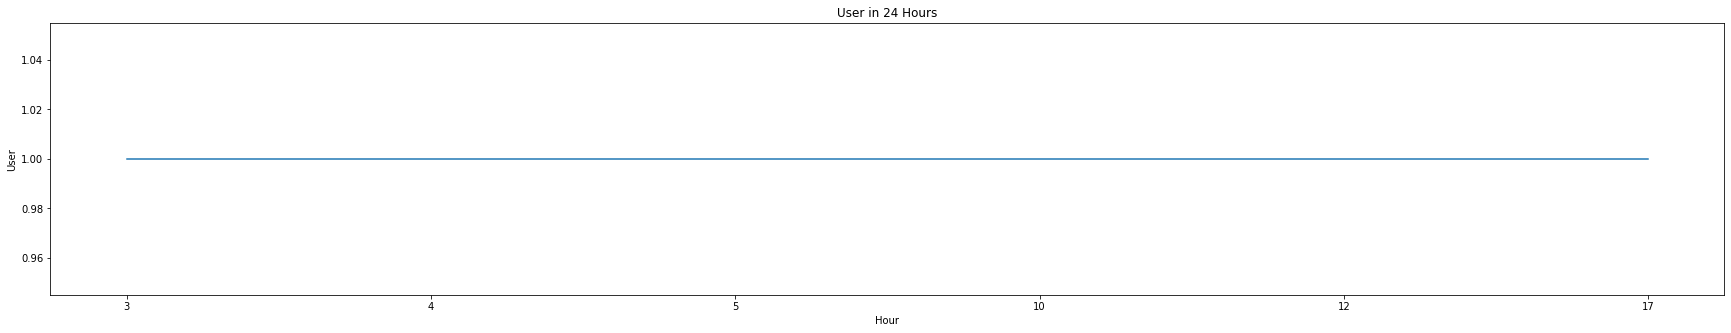

In [ ]:
x = np.arange(0,len(repeat_user_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,repeat_user_timeline02['User'])
ax.set_xticks(x)
ax.set_xticklabels(repeat_user_timeline02['Event Hour'])
ax.set_title('User in 24 Hours')
ax.set_xlabel('Hour')
ax.set_ylabel('User')
    
plt.show()

# **NOVEMBER 2019**

## **Handle The Missing Data**

In [ ]:
# read the data
cols = ['event_time', 'event_type', 'category_code', 'brand', 'price','user_id','user_session']
df2019nov = pd.read_csv('2019-Nov.csv', usecols = cols)
df2019nov.head(10)

,event_time,event_type,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01 UTC,view,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
6,2019-11-01 00:00:01 UTC,view,computers.notebook,hp,514.56,514028527,df8184cc-3694-4549-8c8c-6b5171877376
7,2019-11-01 00:00:02 UTC,view,NaN,rondell,30.86,518574284,5e6ef132-4d7c-4730-8c7f-85aa4082588f
8,2019-11-01 00:00:02 UTC,view,NaN,michelin,72.72,532364121,0a899268-31eb-46de-898d-09b2da950b24
9,2019-11-01 00:00:02 UTC,view,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0


In [ ]:
df2019nov=df2019nov.loc[df2019nov.event_type == 'purchase']

In [ ]:
# simple data checking - get row and column of dataframe
print(df2019nov.shape)

(916939, 7)


In [ ]:
# simple data checking - get columns name
print(df2019nov.columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'price',
       'user_id', 'user_session'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df2019nov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916939 entries, 107 to 67501944
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     916939 non-null  object 
 1   event_type     916939 non-null  object 
 2   category_code  682721 non-null  object 
 3   brand          843577 non-null  object 
 4   price          916939 non-null  float64
 5   user_id        916939 non-null  int64  
 6   user_session   916939 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 56.0+ MB


In [ ]:
# check standard missing value - multiple column
missing_data = df2019nov.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

event_time
False    916939
Name: event_time, dtype: int64

event_type
False    916939
Name: event_type, dtype: int64

category_code
False    682721
True     234218
Name: category_code, dtype: int64

brand
False    843577
True      73362
Name: brand, dtype: int64

price
False    916939
Name: price, dtype: int64

user_id
False    916939
Name: user_id, dtype: int64

user_session
False    916939
Name: user_session, dtype: int64



In [ ]:
# check standard missing value - category_code column
df2019nov[df2019nov['category_code'].isnull()]

,event_time,event_type,category_code,brand,price,user_id,user_session
811,2019-11-01 00:05:34 UTC,purchase,NaN,lucente,109.66,541854711,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927
1387,2019-11-01 00:09:30 UTC,purchase,NaN,xiaomi,29.58,537372295,c5a5ccdb-ed0b-4706-b25d-829f00441279
1626,2019-11-01 00:11:03 UTC,purchase,NaN,maxxis,102.58,536635963,bfc42277-448a-4c26-9c4a-9b590fd5e9c8
1747,2019-11-01 00:11:48 UTC,purchase,NaN,sony,462.79,516426931,ef4867dd-b922-4d92-abec-9a75acb2b769
1934,2019-11-01 00:13:04 UTC,purchase,NaN,carfashion,43.24,564014296,93724f4c-219f-4c5a-9cdf-d24b7140086e
...,...,...,...,...,...,...,...
67499957,2019-11-30 23:46:43 UTC,purchase,NaN,mart,12.84,579644203,c72d79ac-a09e-4459-b794-298b94ec697c
67500223,2019-11-30 23:48:06 UTC,purchase,NaN,xiaomi,32.15,543234577,4e5830ae-dce9-41ac-b087-3eb38ecbc660
67500485,2019-11-30 23:49:39 UTC,purchase,NaN,NaN,33.15,512855930,a87e9761-7503-4b36-9375-3498dbb86a46
67500609,2019-11-30 23:50:31 UTC,purchase,NaN,NaN,277.74,515162380,2842d0e9-4601-49c9-9473-9647f4fca897


In [ ]:
#check the most frequent value object 
df2019nov['category_code'].value_counts().idxmax()

'electronics.smartphone'

In [ ]:
# check standard missing value - brand column
df2019nov[df2019nov['brand'].isnull()]

,event_time,event_type,category_code,brand,price,user_id,user_session
107,2019-11-01 00:00:41 UTC,purchase,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
2662,2019-11-01 00:17:42 UTC,purchase,NaN,NaN,209.79,566281421,f3e93711-e867-45ce-872c-40e20a698494
3965,2019-11-01 00:26:05 UTC,purchase,NaN,NaN,31.91,547211786,61ef6104-d3fa-4cbd-ac5d-77a888ec5bac
5013,2019-11-01 00:31:54 UTC,purchase,NaN,NaN,110.68,552059880,0ca8079b-fa77-447b-8420-370609ee8cad
5320,2019-11-01 00:33:27 UTC,purchase,NaN,NaN,55.86,547961159,471fb850-e031-4b0c-84bd-719e22d1b0cc
...,...,...,...,...,...,...,...
67499603,2019-11-30 23:44:50 UTC,purchase,NaN,NaN,340.03,558165637,f1bce7dd-0d69-492c-8a65-189a70956ee4
67499832,2019-11-30 23:46:03 UTC,purchase,appliances.environment.air_heater,NaN,217.10,569991813,c99ba9f9-a099-4863-add6-94bbc74a3e6c
67500485,2019-11-30 23:49:39 UTC,purchase,NaN,NaN,33.15,512855930,a87e9761-7503-4b36-9375-3498dbb86a46
67500609,2019-11-30 23:50:31 UTC,purchase,NaN,NaN,277.74,515162380,2842d0e9-4601-49c9-9473-9647f4fca897


In [ ]:
# check the most frequent value object - brand column
df2019nov['brand'].value_counts().idxmax()

'samsung'

In [ ]:
# handle missing data - replace values with the most frequent value object - category_code column
df2019nov['category_code'].replace(np.nan, 'electronics.smartphone', inplace=True)

In [ ]:
# handle missing data - replace values with the most frequent value object- brand column
df2019nov['brand'].replace(np.nan, 'samsung', inplace=True)

In [ ]:
# check again standard missing value - multiple column
missing_data = df2019nov.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

event_time
False    916939
Name: event_time, dtype: int64

event_type
False    916939
Name: event_type, dtype: int64

category_code
False    916939
Name: category_code, dtype: int64

brand
False    916939
Name: brand, dtype: int64

price
False    916939
Name: price, dtype: int64

user_id
False    916939
Name: user_id, dtype: int64

user_session
False    916939
Name: user_session, dtype: int64



## **Handle Outlier**

In [ ]:
# simple data checking - get dataframe description
df2019nov.describe()

,price,user_id
count,916939.000000,9.169390e+05
mean,300.123444,5.423052e+08
std,341.380994,2.242181e+07
min,0.770000,1.383403e+08
25%,82.630000,5.187021e+08
50%,169.960000,5.430280e+08
75%,364.750000,5.646835e+08
max,2574.070000,5.799671e+08


In [ ]:
df2019nov.head(10)

,event_time,event_type,category_code,brand,price,user_id,user_session
107,2019-11-01 00:00:41 UTC,purchase,furniture.bedroom.bed,samsung,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
168,2019-11-01 00:01:04 UTC,purchase,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
707,2019-11-01 00:04:51 UTC,purchase,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
811,2019-11-01 00:05:34 UTC,purchase,electronics.smartphone,lucente,109.66,541854711,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927
939,2019-11-01 00:06:33 UTC,purchase,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
942,2019-11-01 00:06:34 UTC,purchase,electronics.audio.subwoofer,nakamichi,123.56,514166940,8ef5214a-86ad-4d0b-8df3-4280dd411b47
1107,2019-11-01 00:07:38 UTC,purchase,construction.tools.welding,magnetta,254.78,515240495,0253151d-5c84-4809-ba02-38ac405494e1
1387,2019-11-01 00:09:30 UTC,purchase,electronics.smartphone,xiaomi,29.58,537372295,c5a5ccdb-ed0b-4706-b25d-829f00441279
1490,2019-11-01 00:10:12 UTC,purchase,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e
1563,2019-11-01 00:10:38 UTC,purchase,electronics.audio.music_tools.piano,cortland,84.94,538417163,3dae61c1-d018-44fd-b95a-b6b7659f11e3


In [ ]:
# assign variable for column in numeric type
numeric_column = ['price']

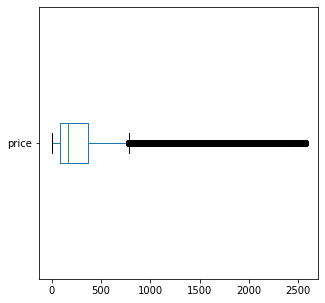

In [ ]:
# check outlier using boxplot - 1
df2019nov.boxplot(
    column=['price'],
    fontsize=10,
    rot=0,
    grid=False,
    figsize=(5,5),
    vert=False
    )

In [ ]:
# get IQR for each numeric column
Q1 = df2019nov[numeric_column].quantile(0.25)
Q3 = df2019nov[numeric_column].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 price    82.63
Name: 0.25, dtype: float64

Q3:
 price    364.75
Name: 0.75, dtype: float64

IQR:
 price    282.12
dtype: float64

Min:
 price   -340.55
dtype: float64

Max:
 price    787.93
dtype: float64


In [ ]:
# filter price
filter_price_min = df2019nov['price']<boxplot_min['price']
filter_price_max = df2019nov['price']>boxplot_max['price']

df2019nov_non_outlier = df2019nov[(
    filter_price_min|filter_price_max
    )]

In [ ]:
df2019nov_non_outlier.shape

(97631, 7)

In [ ]:
df2019nov_non_outlier.head(10)

,event_time,event_type,category_code,brand,price,user_id,user_session
1584,2019-11-01 00:10:47 UTC,purchase,electronics.smartphone,apple,1583.48,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153
1951,2019-11-01 00:13:10 UTC,purchase,electronics.smartphone,apple,1337.23,518267348,61f913b1-ed5f-4495-8139-7e3e20be92c3
2309,2019-11-01 00:15:23 UTC,purchase,electronics.smartphone,apple,1348.61,518840496,ef3daa59-4936-43e5-a530-32902f64b2f4
3723,2019-11-01 00:24:39 UTC,purchase,electronics.smartphone,apple,1665.36,530717866,42968c23-4198-432a-b50b-969bae6c916f
3730,2019-11-01 00:24:44 UTC,purchase,electronics.smartphone,apple,1013.86,516316320,bb657773-1a1e-465d-b742-c54d32e0d82f
3982,2019-11-01 00:26:10 UTC,purchase,electronics.smartphone,apple,1665.36,530717866,42968c23-4198-432a-b50b-969bae6c916f
5284,2019-11-01 00:33:17 UTC,purchase,electronics.smartphone,apple,1665.36,542210844,f7638f88-5128-4c10-967c-7ebc1fb26da8
7422,2019-11-01 00:43:43 UTC,purchase,electronics.smartphone,apple,1348.61,566285050,27f5d428-f19a-4f58-858c-b3147c9e86df
7515,2019-11-01 00:44:06 UTC,purchase,electronics.smartphone,apple,1003.63,551678170,3c403ca1-1a0d-413b-aa45-8551aa4e2920
9399,2019-11-01 00:53:10 UTC,purchase,electronics.smartphone,apple,1348.61,536267449,2ec3f637-ba50-46d1-89ae-c9dfe5012920


## **Handle Date Column**

In [ ]:
# simple data checking - get row and column of dataframe
print(df2019nov_non_outlier.shape)

(97631, 7)


In [ ]:
# simple data checking - get columns name
print(df2019nov_non_outlier.columns)

Index(['event_time', 'event_type', 'category_code', 'brand', 'price',
       'user_id', 'user_session'],
      dtype='object')


In [ ]:
# simple data checking - get dataframe general information
df2019nov_non_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97631 entries, 1584 to 67501745
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     97631 non-null  object 
 1   event_type     97631 non-null  object 
 2   category_code  97631 non-null  object 
 3   brand          97631 non-null  object 
 4   price          97631 non-null  float64
 5   user_id        97631 non-null  int64  
 6   user_session   97631 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.0+ MB


In [ ]:
# simple data checking - check 1 of the date column
df2019nov_non_outlier['event_time'].head(15)

1584     2019-11-01 00:10:47 UTC
1951     2019-11-01 00:13:10 UTC
2309     2019-11-01 00:15:23 UTC
3723     2019-11-01 00:24:39 UTC
3730     2019-11-01 00:24:44 UTC
3982     2019-11-01 00:26:10 UTC
5284     2019-11-01 00:33:17 UTC
7422     2019-11-01 00:43:43 UTC
7515     2019-11-01 00:44:06 UTC
9399     2019-11-01 00:53:10 UTC
11882    2019-11-01 01:03:56 UTC
11895    2019-11-01 01:04:00 UTC
12605    2019-11-01 01:06:41 UTC
12655    2019-11-01 01:06:52 UTC
13024    2019-11-01 01:08:25 UTC
Name: event_time, dtype: object

In [ ]:
df2019nov_non_outlier['event_time'].value_counts()

2019-11-17 10:44:59 UTC    5
2019-11-17 15:10:59 UTC    5
2019-11-17 06:24:22 UTC    5
2019-11-17 11:55:59 UTC    5
2019-11-17 15:10:14 UTC    5
                          ..
2019-11-17 14:17:15 UTC    1
2019-11-17 17:21:40 UTC    1
2019-11-18 10:28:25 UTC    1
2019-11-18 12:41:09 UTC    1
2019-11-16 15:07:31 UTC    1
Name: event_time, Length: 90981, dtype: int64

In [ ]:
# change to date type & change date format
series_date_in_date = pd.to_datetime(df2019nov_non_outlier['event_time'],errors='raise',dayfirst=False,yearfirst=True,utc=True)
series_date_in_date

1584       2019-11-01 00:10:47+00:00
1951       2019-11-01 00:13:10+00:00
2309       2019-11-01 00:15:23+00:00
3723       2019-11-01 00:24:39+00:00
3730       2019-11-01 00:24:44+00:00
                      ...           
67498189   2019-11-30 23:36:38+00:00
67498941   2019-11-30 23:41:08+00:00
67499105   2019-11-30 23:41:58+00:00
67499759   2019-11-30 23:45:40+00:00
67501745   2019-11-30 23:58:22+00:00
Name: event_time, Length: 97631, dtype: datetime64[ns, UTC]

In [ ]:
# parsing date column
series_date_in_date = pd.to_datetime(df2019nov_non_outlier['event_time'],errors='raise',dayfirst=False,yearfirst=True,utc=True)

In [ ]:
series_date_in_date.dt.day

1649         1
1905         1
2927         1
5210         1
6496         1
            ..
42446632    31
42446893    31
42447140    31
42447440    31
42448362    31
Name: event_time, Length: 71345, dtype: int64

In [ ]:
series_date_in_date.dt.month

1649        10
1905        10
2927        10
5210        10
6496        10
            ..
42446632    10
42446893    10
42447140    10
42447440    10
42448362    10
Name: event_time, Length: 71345, dtype: int64

In [ ]:
series_date_in_date.dt.year

1649        2019
1905        2019
2927        2019
5210        2019
6496        2019
            ... 
42446632    2019
42446893    2019
42447140    2019
42447440    2019
42448362    2019
Name: event_time, Length: 71345, dtype: int64

In [ ]:
df2019nov_non_outlier['event_days_of_week'] = series_date_in_date.dt.day_name()
df2019nov_non_outlier['event_days_of_week']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1584          Friday
1951          Friday
2309          Friday
3723          Friday
3730          Friday
              ...   
67498189    Saturday
67498941    Saturday
67499105    Saturday
67499759    Saturday
67501745    Saturday
Name: event_days_of_week, Length: 97631, dtype: object

In [ ]:
df2019nov_non_outlier['event_date'] = series_date_in_date.dt.day
df2019nov_non_outlier['event_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1584         1
1951         1
2309         1
3723         1
3730         1
            ..
67498189    30
67498941    30
67499105    30
67499759    30
67501745    30
Name: event_date, Length: 97631, dtype: int64

In [ ]:
df2019nov_non_outlier['event_hour'] = series_date_in_date.dt.hour
df2019nov_non_outlier['event_hour']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1584         0
1951         0
2309         0
3723         0
3730         0
            ..
67498189    23
67498941    23
67499105    23
67499759    23
67501745    23
Name: event_hour, Length: 97631, dtype: int64

## **Best Products to Sell**

In [ ]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# Popular brands in new user
new_user = df2019nov_non_outlier.drop_duplicates()
new_user['brand'].value_counts()

apple       81524
samsung      8590
acer          915
lenovo        830
lg            540
            ...  
kiturami        1
silva           1
htc             1
kaiser          1
neumann         1
Name: brand, Length: 224, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fccc350dd10>],
      dtype=object)

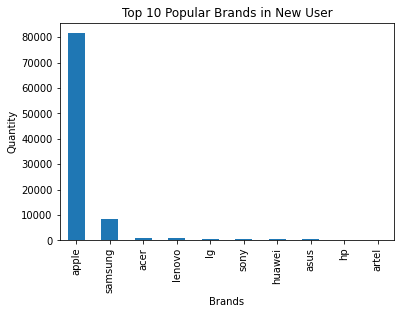

In [ ]:
# Top 10 popular brands in new user
new_user['brand'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Brands', 
    ylabel='Quantity', 
    label='Top 10 Popular Brands in New User', 
    subplots=True
    )

In [ ]:
# Popular product in repeat user
repeat_user = df2019nov_non_outlier[df2019nov_non_outlier.duplicated()]
repeat_user['brand'].value_counts()

Series([], Name: brand, dtype: int64)

In [ ]:
# Popular categories in new user
new_user['category_code'].value_counts()

electronics.smartphone                    88999
computers.notebook                         3773
electronics.video.tv                       1597
appliances.kitchen.refrigerators            660
computers.desktop                           612
electronics.clocks                          312
electronics.tablet                          287
furniture.living_room.sofa                  216
appliances.environment.air_conditioner      202
appliances.kitchen.washer                   151
appliances.sewing_machine                   139
appliances.kitchen.coffee_machine            93
appliances.environment.vacuum                78
electronics.camera.photo                     61
computers.components.videocards              43
electronics.audio.acoustic                   35
construction.tools.saw                       31
electronics.camera.video                     30
furniture.kitchen.table                      29
sport.bicycle                                27
kids.carriage                           

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fccc3bebbd0>],
      dtype=object)

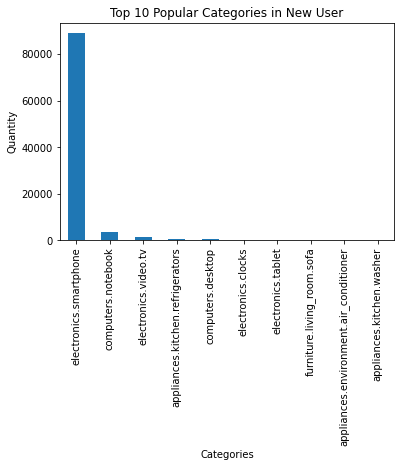

In [ ]:
# Top 10 popular categories in new user
new_user['category_code'].value_counts().nlargest(10).plot(
    kind='bar', 
    xlabel='Categories', 
    ylabel='Quantity', 
    label='Top 10 Popular Categories in New User', 
    subplots=True
    )

In [ ]:
# Popular categories in repeat user
repeat_user['category_code'].value_counts().nlargest(10)

Series([], Name: category_code, dtype: int64)

## **Best Event to predict that User most likely to buy a product**

In [ ]:
# Best Event time
new_user['event_time'].value_counts().nlargest(10)

2019-11-17 10:44:59 UTC    5
2019-11-17 15:10:59 UTC    5
2019-11-17 06:24:22 UTC    5
2019-11-17 11:55:59 UTC    5
2019-11-17 15:10:14 UTC    5
2019-11-16 11:44:29 UTC    5
2019-11-17 17:09:27 UTC    4
2019-11-16 10:26:47 UTC    4
2019-11-17 17:05:26 UTC    4
2019-11-17 05:12:11 UTC    4
Name: event_time, dtype: int64

In [ ]:
# Best Event time
repeat_user['event_time'].value_counts().nlargest(10)

Series([], Name: event_time, dtype: int64)

In [ ]:
# Best event type in new user
new_user['event_type'].value_counts()

purchase    97631
Name: event_type, dtype: int64

In [ ]:
# Best event type in repeat user
repeat_user['event_type'].value_counts()

Series([], Name: event_type, dtype: int64)

## **Time Series** 

### **New User**

In [ ]:
new_user.head()

,event_time,event_type,category_code,brand,price,user_id,user_session,event_days_of_week,event_date,event_hour
1584,2019-11-01 00:10:47 UTC,purchase,electronics.smartphone,apple,1583.48,562210838,a58d94c8-c0d4-4f24-bf3c-04c4e69ea153,Friday,1,0
1951,2019-11-01 00:13:10 UTC,purchase,electronics.smartphone,apple,1337.23,518267348,61f913b1-ed5f-4495-8139-7e3e20be92c3,Friday,1,0
2309,2019-11-01 00:15:23 UTC,purchase,electronics.smartphone,apple,1348.61,518840496,ef3daa59-4936-43e5-a530-32902f64b2f4,Friday,1,0
3723,2019-11-01 00:24:39 UTC,purchase,electronics.smartphone,apple,1665.36,530717866,42968c23-4198-432a-b50b-969bae6c916f,Friday,1,0
3730,2019-11-01 00:24:44 UTC,purchase,electronics.smartphone,apple,1013.86,516316320,bb657773-1a1e-465d-b742-c54d32e0d82f,Friday,1,0


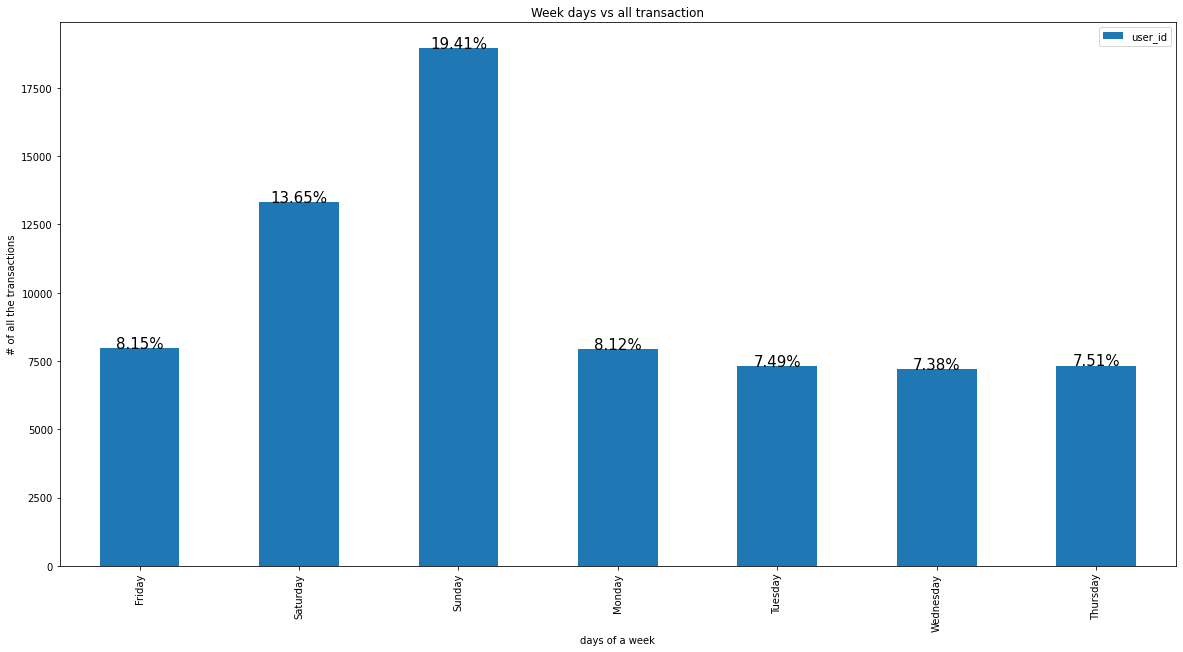

In [ ]:
ax = new_user.groupby(new_user['event_days_of_week'],sort=False)['user_id'].nunique().reset_index().set_index('event_days_of_week').plot.bar(figsize=(20,10))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(new_user)*100),
            ha="center", fontsize=15)

plt.show()

In [ ]:
#Timeplot01

new_user_timeline01 = new_user.groupby(new_user['event_date'])['user_id'].nunique().reset_index()
new_user_timeline01.columns = ['Event Date','User']
new_user_timeline01

,Event Date,User
0,1,1739
1,2,1528
2,3,1620
3,4,2136
4,5,1948
5,6,1903
6,7,1824
7,8,2037
8,9,1711
9,10,1732


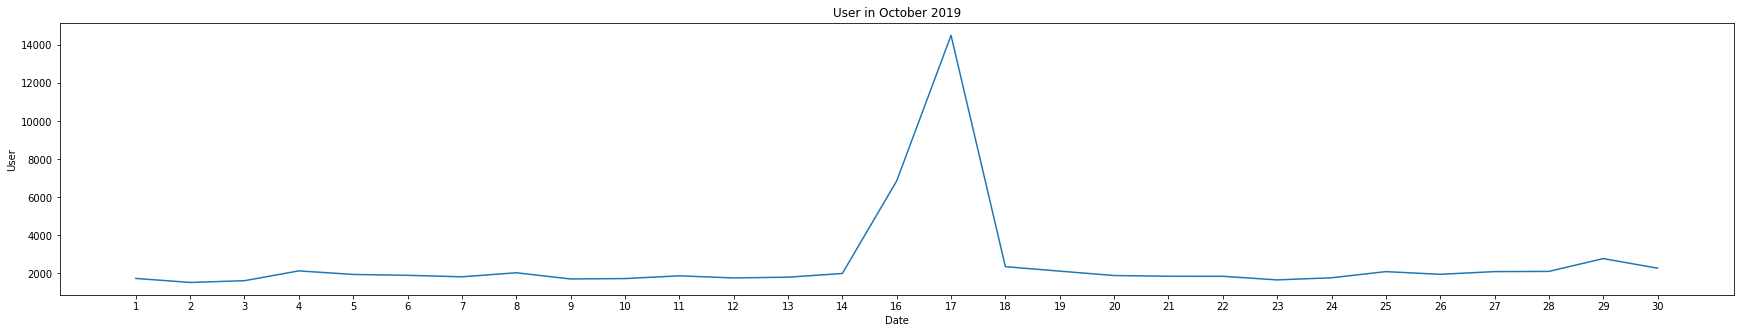

In [ ]:
x = np.arange(0,len(new_user_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,new_user_timeline01['User'])
ax.set_xticks(x)
ax.set_xticklabels(new_user_timeline01['Event Date'])
ax.set_title('User in October 2019')
ax.set_xlabel('Date')
ax.set_ylabel('User')
  
plt.show()

In [ ]:
#Timeplot02

new_user_timeline02 = new_user.groupby(new_user['event_hour'])['user_id'].nunique().reset_index()
new_user_timeline02.columns = ['Event Hour','User']
new_user_timeline02

,Event Hour,User
0,0,272
1,1,327
2,2,729
3,3,1901
4,4,3311
5,5,4238
6,6,4656
7,7,4626
8,8,5615
9,9,6179


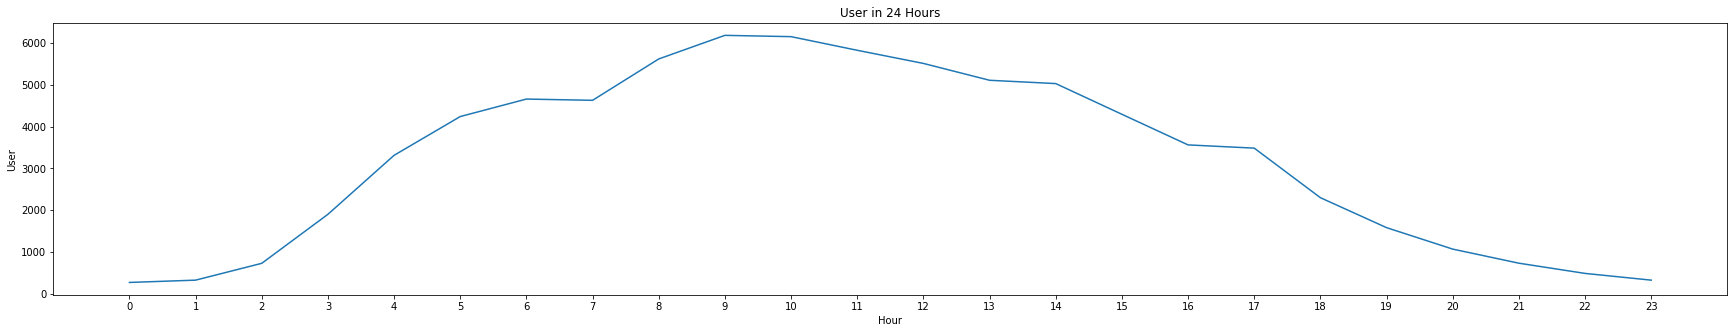

In [ ]:
x = np.arange(0,len(new_user_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,new_user_timeline02['User'])
ax.set_xticks(x)
ax.set_xticklabels(new_user_timeline02['Event Hour'])
ax.set_title('User in 24 Hours')
ax.set_xlabel('Hour')
ax.set_ylabel('User')
    
plt.show()

### **Repeat User**

In [ ]:
repeat_user.head()

,event_time,event_type,category_code,brand,price,user_id,user_session,event_days_of_week,event_date,event_hour


# **RFM Analysis**

## **Preparation**

In [ ]:
frames = [df2019oct_non_outlier, df2019nov_non_outlier]
data=pd.concat(frames)

In [ ]:
data.head()

,event_time,event_type,category_code,brand,price,user_id,user_session,event_days_of_week,event_date,event_hour
1649,2019-10-01 02:19:34 UTC,purchase,electronics.smartphone,apple,975.57,555160488,a1395546-c124-456c-9752-0f5cf883c63d,Tuesday,1,2
1905,2019-10-01 02:20:33 UTC,purchase,electronics.smartphone,apple,946.97,516198933,e1050ba4-5425-4b8e-9cc8-194878031718,Tuesday,1,2
2927,2019-10-01 02:23:25 UTC,purchase,electronics.smartphone,apple,1747.79,515384420,7f82b450-6c45-4346-96fb-ecf4ab25779c,Tuesday,1,2
5210,2019-10-01 02:28:40 UTC,purchase,electronics.smartphone,apple,975.57,552408931,e8b95f1a-5f87-40ab-b75a-40942d5a1726,Tuesday,1,2
6496,2019-10-01 02:31:01 UTC,purchase,electronics.smartphone,apple,1206.40,555462711,38c6d3f7-6c32-4fed-bca6-ef98e1746386,Tuesday,1,2


In [ ]:
%%time
data['event_time']=pd.to_datetime(data['event_time']).dt.tz_convert(None)

CPU times: user 23.6 s, sys: 65 ms, total: 23.7 s
Wall time: 23.8 s


In [ ]:
data.dtypes

event_time            datetime64[ns]
event_type                    object
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
event_days_of_week            object
event_date                     int64
event_hour                     int64
dtype: object

In [ ]:
%%time
#save dataframe as feather in case our notebook got crashed
#feather save column data types
import pyarrow.feather as feather
os.makedirs('tmp', exist_ok=True)  # Make a temp dir for storing the feather file
feather.write_feather(data, './tmp/data')

CPU times: user 126 ms, sys: 52.3 ms, total: 178 ms
Wall time: 444 ms


In [ ]:
%%time
#load the feather data cause feather more lightweight
data = pd.read_feather('./tmp/data')
data

CPU times: user 70.2 ms, sys: 78.1 ms, total: 148 ms
Wall time: 177 ms


In [ ]:
data.dtypes

event_time            datetime64[ns]
event_type                    object
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
event_days_of_week            object
event_date                     int64
event_hour                     int64
dtype: object

In [ ]:
data=data.groupby(by='user_session').agg(Date_order=('event_time',lambda x: x.max()),
                                                  user_id=('user_id',lambda x: x.unique()),
                                          Quantity=('user_session','count'),
                                         money_spent=('price','sum')).reset_index(drop=True)
data

,Date_order,user_id,Quantity,money_spent
0,2019-11-17 05:52:39,516763048,1,795.90
1,2019-11-17 07:49:40,572468447,1,795.13
2,2019-11-05 10:08:48,567769006,1,915.85
3,2019-10-15 06:29:33,519267944,1,1541.58
4,2019-10-21 09:57:11,554836187,1,999.61
...,...,...,...,...
147356,2019-10-17 06:10:22,512742411,1,1010.14
147357,2019-10-02 08:32:17,532580318,1,1415.48
147358,2019-10-29 05:18:45,565273783,2,2715.20
147359,2019-11-27 12:42:23,571371835,1,959.73


## **Modelling**

In [ ]:
data['Date_order'].max()

Timestamp('2019-11-30 23:58:22')

In [ ]:
import datetime as dt
study_date = dt.datetime(2019,12,1)
data=pd.DataFrame(data)
data['last_purchase']=study_date - data['Date_order']
data['last_purchase'].astype('timedelta64[D]')
data['last_purchase']=data['last_purchase'] / np.timedelta64(1, 'D')
data.head()

,Date_order,user_id,Quantity,money_spent,last_purchase
0,2019-11-17 05:52:39,516763048,1,795.90,13.755104
1,2019-11-17 07:49:40,572468447,1,795.13,13.673843
2,2019-11-05 10:08:48,567769006,1,915.85,25.577222
3,2019-10-15 06:29:33,519267944,1,1541.58,46.729479
4,2019-10-21 09:57:11,554836187,1,999.61,40.585289


In [ ]:
#Calculate Recency, Frequency, and Monetary of the data
RFM= data.groupby('user_id').agg(Recency=('last_purchase',lambda x: x.min()),
                                 Frequency=('user_id',lambda x: x.count()),
                                 Monetary=('money_spent',lambda x: x.sum()))
RFM.head()

,Recency,Frequency,Monetary
user_id,,,
304707635,17.539884,1,2007.52
369801696,17.657002,2,3180.19
413528456,3.107130,1,1827.33
419993051,20.443414,1,914.64
428293417,28.610706,1,1575.50


**Frequency**

In [ ]:
RFM['Frequency'].describe()

count    82402.000000
mean         1.788318
std          2.675399
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        166.000000
Name: Frequency, dtype: float64

**Monetary**

In [ ]:
RFM['Recency'].describe()

count    82402.000000
mean        24.224900
std         17.025036
min          0.001134
25%         13.223733
50%         17.879676
75%         38.486322
max         60.902396
Name: Recency, dtype: float64

**RFM Segmentation**

In [ ]:
RFM.quantile(q=[0.25,0.5,0.75])

,Recency,Frequency,Monetary
0.25,13.223733,1.0,964.760
0.50,17.879676,1.0,1352.545
0.75,38.486322,2.0,2204.105


In [ ]:
quartiles=RFM.quantile(q=[0.25,0.5,0.75]).to_dict()
quartiles

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0},
 'Monetary': {0.25: 964.76, 0.5: 1352.545, 0.75: 2204.1050000000005},
 'Recency': {0.25: 13.223732638888889,
  0.5: 17.879675925925923,
  0.75: 38.48632233796296}}

Creation of RFM Segments

In [ ]:
## for Recency 

def R(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary 

def FM(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1 

In [ ]:
#create RFM segmentation column
RFM['R_Quartile'] = RFM['Recency'].apply(R, args=('Recency',quartiles,))
RFM['F_Quartile'] = RFM['Frequency'].apply(FM, args=('Frequency',quartiles,))
RFM['M_Quartile'] = RFM['Monetary'].apply(FM, args=('Monetary',quartiles,))
RFM['RFM_segmentation'] = RFM.R_Quartile.map(str) \
                    + RFM.F_Quartile.map(str) \
                    + RFM.M_Quartile.map(str)
RFM['RFM_score'] = RFM.R_Quartile.map(int) \
                    + RFM.F_Quartile.map(int) \
                    + RFM.M_Quartile.map(int)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score
user_id,,,,,,,,
304707635,17.539884,1,2007.52,2,4,2,242,8
369801696,17.657002,2,3180.19,2,2,1,221,5
413528456,3.107130,1,1827.33,1,4,2,142,7
419993051,20.443414,1,914.64,3,4,4,344,11
428293417,28.610706,1,1575.50,3,4,2,342,9


In [ ]:
# Define rfm_level function
def RFM_label(data):
    if data['RFM_score'] >= 10:
        return 'Lost'
    elif ((data['RFM_score'] >= 9) and (data['RFM_score'] < 10)):
        return 'Hibernating'
    elif ((data['RFM_score'] >= 8) and (data['RFM_score'] < 9)):
        return 'Can’t Lose Them'
    elif ((data['RFM_score'] >= 7) and (data['RFM_score'] < 8)):
        return 'About To Sleep'
    elif ((data['RFM_score'] >= 6) and (data['RFM_score'] < 7)):
        return 'Promising'
    elif ((data['RFM_score'] >= 5) and (data['RFM_score'] < 6)):
        return 'Potential Loyalist'
    elif ((data['RFM_score'] >= 4) and (data['RFM_score'] < 5)):
        return 'Loyal Customers'
    else:
        return 'Champions'
#Create RFM label for customer
RFM['RFM_label'] = RFM.apply(RFM_label, axis=1)
RFM.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segmentation,RFM_score,RFM_label
user_id,,,,,,,,,
304707635,17.539884,1,2007.52,2,4,2,242,8,Can’t Lose Them
369801696,17.657002,2,3180.19,2,2,1,221,5,Potential Loyalist
413528456,3.107130,1,1827.33,1,4,2,142,7,About To Sleep
419993051,20.443414,1,914.64,3,4,4,344,11,Lost
428293417,28.610706,1,1575.50,3,4,2,342,9,Hibernating


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
RFM_desc = RFM.groupby('RFM_label').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_desc)

                   Recency Frequency Monetary       
                      mean      mean     mean  count
RFM_label                                           
About To Sleep        22.0       1.5   2198.9   6435
Can’t Lose Them       17.6       1.1   1595.8   8513
Champions              5.1       6.3   8835.0   4662
Hibernating           15.9       1.0   1218.9  14154
Lost                  35.1       1.0   1070.3  32786
Loyal Customers       10.5       3.6   5285.3   3992
Potential Loyalist    17.8       3.5   4842.5   6351
Promising             27.7       2.7   3823.7   5509


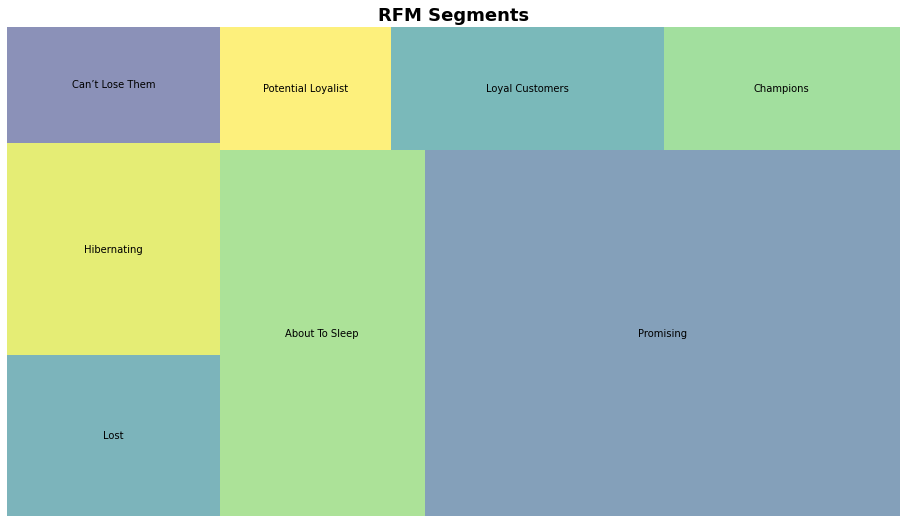

In [ ]:
#RFM_desc.columns = RFM_desc.columns.droplevel()
RFM_desc.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_desc['Count'], 
              label=['Lost',
                     'Hibernating',
                     'Can’t Lose Them',
                     'About To Sleep',
                     'Promising', 
                     'Potential Loyalist', 
                     'Loyal Customers',
                     'Champions'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()